## 吴恩达机器学习习题七：聚类（K-均值算法）<br><br>
- 使用kmeans对图片颜色进行聚类RGB图像，每个像素点值范围0-255

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
def init_contros(X,k):
    index = np.random.choice(len(X),k)
    return X[index]

In [3]:
def find_centroids(X,centros):
    
    idxs = []
    for i in range(len(X)):
        distance = np.linalg.norm((X[i]-centros),axis=1)
        idx = np.argmin(distance)
        idxs.append(idx)
    return np.array(idxs)

In [4]:
def compute_centros(X,idxs,k):
    
    centros = []
    for i in range(k):
        centros_i = np.mean(X[i == idxs],axis=0)
        centros.append(centros_i)
    return np.array(centros)

In [5]:
def run_kmeans(X,init_contors,times):
    
    k = len(init_contors)
    final_centros = []
    final_centros.append(init_contors)
    centros_i = init_contors
    for i in range(times):
        idxs = find_centroids(X,init_contors)
        centros_i = compute_centros(X,idxs,k)
        final_centros.append(centros_i)
    return idxs,np.array(final_centros)    

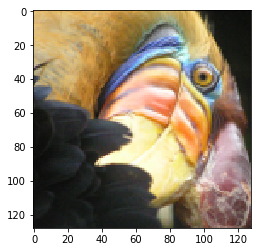

In [6]:
#读取图片
data = sio.loadmat('data/bird_small.mat')
A = data['A']  #(128,128,3)

imagine = io.imread('data/bird_small.png')  #io.imread读取图片
plt.imshow(imagine)  #plt.imshow显示图片

In [7]:
A = A / 255
A = A.reshape(-1,3)  #(128*128,3)

[[[0.44313725 0.52156863 0.58431373]
  [0.69803922 0.54509804 0.31764706]
  [0.32156863 0.28235294 0.27843137]
  ...
  [0.74901961 0.69411765 0.57647059]
  [0.3372549  0.37647059 0.40392157]
  [0.48235294 0.3372549  0.32941176]]

 [[0.47802132 0.5382092  0.66284202]
  [0.70878735 0.52021434 0.24674868]
  [0.32461791 0.27131514 0.23589055]
  ...
  [0.75683582 0.69275063 0.65032829]
  [0.33712152 0.36534614 0.4274243 ]
  [0.49085692 0.36151472 0.25045868]]

 [[0.47802132 0.5382092  0.66284202]
  [0.70878735 0.52021434 0.24674868]
  [0.32461791 0.27131514 0.23589055]
  ...
  [0.75683582 0.69275063 0.65032829]
  [0.33712152 0.36534614 0.4274243 ]
  [0.49085692 0.36151472 0.25045868]]

 ...

 [[0.47802132 0.5382092  0.66284202]
  [0.70878735 0.52021434 0.24674868]
  [0.32461791 0.27131514 0.23589055]
  ...
  [0.75683582 0.69275063 0.65032829]
  [0.33712152 0.36534614 0.4274243 ]
  [0.49085692 0.36151472 0.25045868]]

 [[0.47802132 0.5382092  0.66284202]
  [0.70878735 0.52021434 0.24674868]


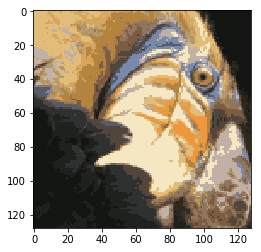

In [8]:
k =16
init_contros1 = init_contros(A,k)
idxs1,final_centroids1 = run_kmeans(A,init_contros1,20)
final_centroids2 = final_centroids1[-1]
im = np.zeros(A.shape)
for i in range(k):
    im[i == idxs1] = final_centroids2[i]
im = im.reshape(128,128,3)
plt.imshow(im)